In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.decomposition import PCA
import seaborn as sns

from ipywidgets import interact, FloatSlider, widgets

import plotly.express as px

In [3]:
pd.set_option('display.max_columns', None)

# HW:
The data set includes the churn of customers of a telecommunications company.
The task is to create segments from customers based on their characteristics using the KMeans algorithm.

Do not use the following variables for grouping:
- churn?: has the customer dropped out?
- Contract_date: contract conclusion time
- Cust_ID: customer ID

In [4]:
file_path = "./telco_sampled.csv"
df = pd.read_csv(file_path, sep = ';')

In [5]:
df.head()

,Contract_date,Package,Gender,Age,Marital_Status,Living_Condition,Graduation,Job_Type,Income,Peak_minute_09,Weekend_minute_09,Offpeak_minute_09,Offpeak_nr_09,Peak_nr_09,Weekend_nr_09,Selfnet_minute_09,Fixed_minute_09,Othermob_minute_09,Voicemail_nr_09,Voicemail_minute_09,SMS_09,Peak_minute_10,Weekend_minute_10,Offpeak_minute_10,Offpeak_nr_10,Peak_nr_10,Weekend_nr_10,Selfnet_minute_10,Fixed_minute_10,Othermob_minute_10,Voicemail_nr_10,Voicemail_minute_10,SMS_10,Peak_minute_11,Weekend_minute_11,Offpeak_minute_11,Offpeak_nr_11,Peak_nr_11,Weekend_nr_11,Selfnet_minute_11,Fixed_minute_11,Othermob_minute_11,Voicemail_nr_11,Voicemail_minute_11,SMS_11,Peak_minute_12,Weekend_minute_12,Offpeak_minute_12,Offpeak_nr_12,Peak_nr_12,Weekend_nr_12,Selfnet_minute_12,Fixed_minute_12,Othermob_minute_12,Voicemail_nr_12,Voicemail_minute_12,SMS_12,churn?,Cust_ID
0,9/20/04 12:00 AM,PACK_B,Male,42.0,Married,Owner,University,Leader,15_30k,0.55,0.28,0.00,0.0,2.0,1.0,0.83,0.00,0.00,3.0,0.83,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0,ID0020614
1,2/12/05 12:00 AM,PACK_B,Female,53.0,Married,Owner,University,Public_Employee,Below_15k,11.32,6.53,6.98,26.0,37.0,19.0,6.70,8.02,10.12,21.0,21.90,58.0,25.70,5.28,15.38,52.0,77.0,32.0,11.07,12.80,22.50,30.0,37.33,128.0,25.33,0.00,7.60,51.0,49.0,20.0,1.83,14.52,16.58,36.0,32.93,83.0,11.95,3.60,4.28,25.0,40.0,25.0,0.93,6.20,12.70,21.0,19.83,66.0,0,ID0029505
2,10/19/04 12:00 AM,PACK_X,Male,43.0,Married,Owner,Highschool,Executive,30_60k,78.05,3.90,8.43,5.0,103.0,9.0,19.67,2.83,67.88,116.0,90.38,1.0,24.30,15.53,2.63,9.0,40.0,16.0,17.15,1.68,23.35,65.0,42.47,0.0,55.27,1.27,1.75,7.0,64.0,4.0,6.63,15.45,36.20,74.0,58.28,1.0,9.97,8.65,4.23,3.0,22.0,18.0,2.98,0.38,9.40,31.0,22.07,12.0,0,ID0050206
3,10/31/04 12:00 AM,PACK_B,Male,32.0,Married,Owner,Highschool,Labourer,15_30k,0.08,0.00,0.00,0.0,1.0,0.0,0.08,0.00,0.00,1.0,0.08,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0,ID0050343
4,11/19/04 12:00 AM,PACK_B,Female,31.0,Married,Owner,Highschool,Public_Employee,30_60k,20.68,13.87,33.27,49.0,30.0,26.0,37.90,0.53,23.02,79.0,67.82,26.0,42.08,24.48,31.10,39.0,56.0,28.0,65.58,1.53,26.10,100.0,97.67,23.0,31.52,28.27,28.37,33.0,48.0,46.0,50.80,0.62,31.17,103.0,86.70,21.0,49.68,35.90,29.45,69.0,78.0,47.0,71.17,2.13,31.05,121.0,111.40,64.0,0,ID0050688


In [6]:
df['churn?'].value_counts()

churn?
0    1224
1     341
Name: count, dtype: int64

# 1. Subtask: (data preparation)
Use all variables except for the three variables above when creating the clusters. Perform data preparation so that the variables are input to the model in the appropriate form.

(hint: categorical variables, missing values, scaling, etc.)

In [7]:
# Exclude unnecessary columns
df = df.drop(['churn?', 'Contract_date', 'Cust_ID'], axis=1)

# Handle categorical variables
df = pd.get_dummies(df, drop_first=True)

# Identify and handle missing values
df.fillna(df.mean(), inplace=True)  # Numerical
df = df.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == 'object' else x)  # Categorical

# Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


# 2. Subtask: (clustering)
Find the optimal k value for the KMeans algorithm using the variables prepared in the previous task. Then group the customers.

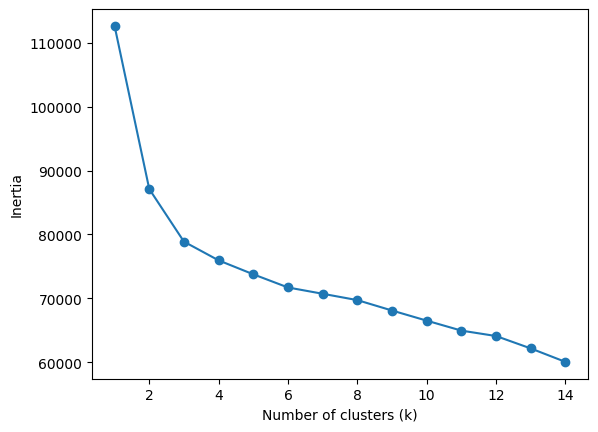

In [8]:
inertias = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 15), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()



# Fromt the plot, we find that k = 3 or k = 4 is optimal
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)


# 3. Subtask: (explaination of clusters / conclusions)
Try to find an explanation of what characterizes each group and what characteristics caused each customer to be in the given cluster.

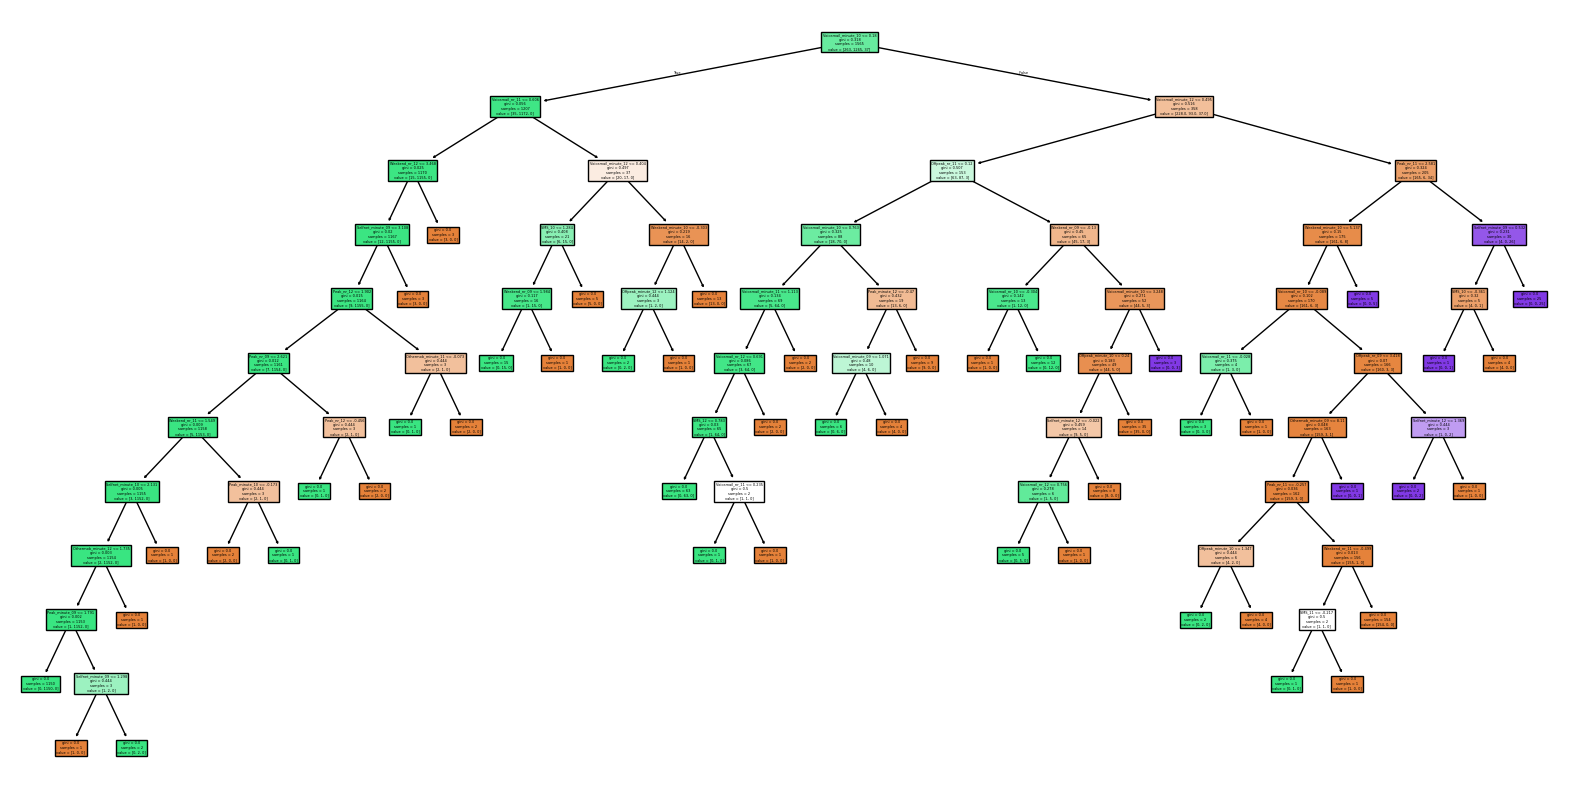

In [9]:
# Analyze cluster characteristics
cluster_profiles = df.groupby('Cluster').mean()

# Decision tree to explain clusters
X = scaled_data
y = df['Cluster']
clf = DecisionTreeClassifier()
clf.fit(X, y)

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=df.columns, filled=True)
plt.show()



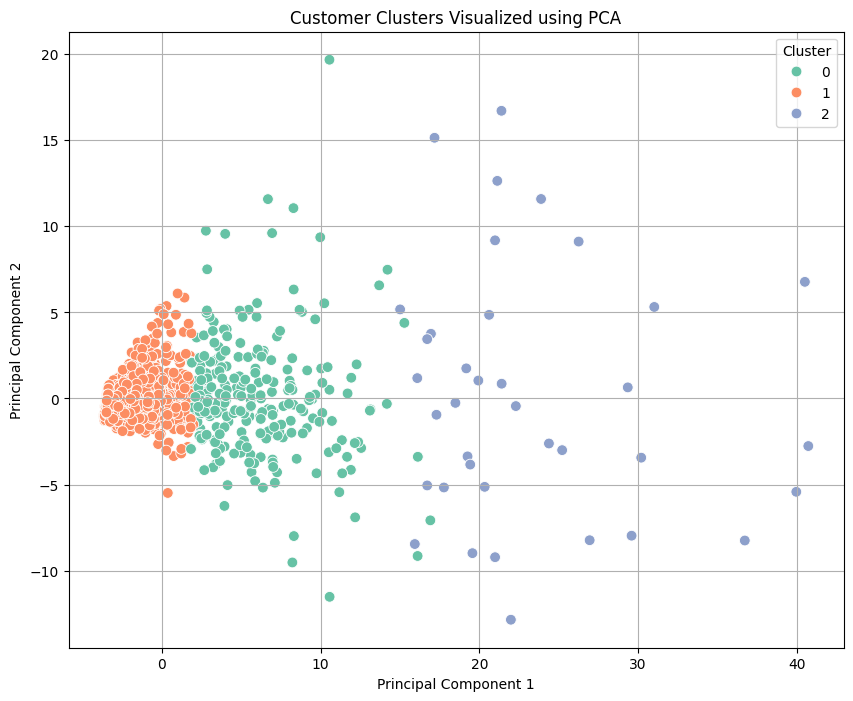

In [10]:
# Reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame for visualization
df_pca = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

# Visualize clusters in 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set2', data=df_pca, s=60)
plt.title('Customer Clusters Visualized using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [11]:
# Step 1: Rebuild preprocessed_data without the 'Cluster' column
columns_to_use = [col for col in df.columns if col not in ['Cust_ID', 'churn?', 'Contract_date', 'Cluster']]
preprocessed_data = df[columns_to_use]

# Verify shapes again
print("Shape of preprocessed data:", preprocessed_data.shape)  # Should now match (1565, 72)

# Step 2: Re-align columns and create centroids DataFrame
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=preprocessed_data.columns)

# Step 3: Re-run cluster profile examination
df['Cluster'] = kmeans.labels_
cluster_profiles = df.groupby('Cluster')[preprocessed_data.columns].mean()

# Display the profiles
print(cluster_profiles)


Shape of preprocessed data: (1565, 72)
               Age  Peak_minute_09  Weekend_minute_09  Offpeak_minute_09  \
Cluster                                                                    
0        31.551331       67.272015          39.894183          61.655817   
1        34.744664       12.575723           7.228221           9.245723   
2        31.567568      234.267838         109.141081         172.416486   

         Offpeak_nr_09  Peak_nr_09  Weekend_nr_09  Selfnet_minute_09  \
Cluster                                                                
0            45.958175   78.353612      38.471483          74.593308   
1            10.137549   18.182609       9.640316          11.558474   
2           143.405405  249.648649     116.567568         180.965676   

         Fixed_minute_09  Othermob_minute_09  Voicemail_nr_09  \
Cluster                                                         
0              11.723498           85.253308       122.357414   
1               2.457747

In [18]:
# Step 1: Prepare the dataset
# Assuming df is your DataFrame and the cluster labels are already added
# Run PCA excluding the 'Cluster' column
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.drop(columns=['Cluster']))  # Adjust to exclude the cluster column

# Add PCA results to DataFrame
df['PC1'] = pca_result[:, 0]
df['PC2'] = pca_result[:, 1]

# Step 2: Function to plot the scatter plot, adjusting color or size by the chosen variable
def plot_pca(variable):
    plt.figure(figsize=(10, 6))
    
    # If variable is numeric, use it to adjust the point sizes
    if pd.api.types.is_numeric_dtype(df[variable]):
        sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', size=variable, sizes=(20, 200), palette='viridis', alpha=0.6)
    else:
        # Use different colors for different values of the selected categorical variable
        sns.scatterplot(data=df, x='PC1', y='PC2', hue=variable, style='Cluster', palette='viridis', alpha=0.6)
    
    plt.title(f'PCA Scatter Plot - Colored/Scaled by {variable}')
    plt.xlabel('Principal Component 1 (PC1)')
    plt.ylabel('Principal Component 2 (PC2)')
    
    # Set x and y limits for consistency
    plt.xlim(df['PC1'].min() - 1, df['PC1'].max() + 1)
    plt.ylim(df['PC2'].min() - 1, df['PC2'].max() + 1)
    
    # Add horizontal and vertical lines at 0 for reference
    plt.axhline(y=0, color='k', linestyle='--', lw=0.8)
    plt.axvline(x=0, color='k', linestyle='--', lw=0.8)
    
    # Display the plot
    plt.legend(loc='best', title=variable)
    plt.grid(True)
    plt.show()

# Step 3: Use interact to create dropdown menu for variable selection
variable_dropdown = widgets.Dropdown(
    options=df.columns.drop(['Cluster', 'PC1', 'PC2']),
    value=df.columns[0],  # Default value
    description='Variable:'
)

# Interact function to update the plot based on the selected variable
interact(plot_pca, variable=variable_dropdown)

interactive(children=(Dropdown(description='Variable:', options=('Age', 'Peak_minute_09', 'Weekend_minute_09',…

<function __main__.plot_pca(variable)>

In [14]:
# # Conclusion

# Cluster 0: Moderate Users
#   Age: Average age of around 31.5 years.
#   Usage Pattern: Moderate across all usage categories (peak, weekend, off-peak). They use around 67 minutes during peak times and 61 minutes during off-peak, with a balanced distribution across different times.
#   Voice Services: Moderate engagement with voicemail, around 169 minutes per month. Other mobile minutes are relatively average (85 minutes).
#   SMS: Average SMS usage (45-51 messages across different months).
#   Packages: Most common package is "PACK_B" (39%), with significant usage of "PACK_X" (24%).
#   Gender & Demographics: Predominantly male (64%) and married (59%). A majority own their living condition (78%).
#   Job & Income: High representation among public employees (38%) and laborers (38%). Around 38% have an income in the 30-60k range.
#       Conclusion: Cluster 0 represents moderately active users who have balanced usage across different services. They are typically working-class individuals, predominantly male, and inclined towards packages offering flexibility like "PACK_B."
# 
# Cluster 1: Low Users
#   Age: Slightly older, average age of around 34.7 years.
#   Usage Pattern: Significantly lower usage across all metrics. For instance, peak minutes are just around 12, and off-peak minutes are also low (~9). Voicemail usage is similarly minimal (29 minutes).
#   Voice Services: Very low mobile and fixed-line minutes.
#   SMS: Low SMS usage (~10 messages).
#   Packages: High proportion using "PACK_B" (43%) and "PACK_X" (24%).
#   Gender & Demographics: A bit more evenly distributed by gender (58% male). Higher tendency to be married (66%) and own their residence (85%).
#   Job & Income: Broad range of jobs, with notable representation among public employees (36%) and a smaller proportion of retired individuals (5%). Income tends to be in the 30-60k range (38%) but with a higher-than-average percentage below 15k (14%).
#       Conclusion: Cluster 1 appears to capture low-usage customers. They tend to be slightly older, stable (married, homeowners), and economically varied, with many favoring basic and budget-friendly packages.
# 
# Cluster 2: Heavy Users
#   Age: Similar to Cluster 0, average age is around 31.6 years.
#   Usage Pattern: Significantly higher usage across all categories. For example, 234 peak minutes, 172 off-peak minutes, and voicemail minutes reaching over 500 in a month. This group makes extensive use of their services.
#   Voice Services: Much higher mobile minutes (~327) and frequent use of voicemail (~377).
#   SMS: Heavier SMS users, averaging over 100 messages per month.
#   Packages: Preference for "PACK_X" (37%) and "PACK_B" (24%), with higher diversity across package usage than the other clusters.
#   Gender & Demographics: Predominantly male (73%) and, while married (56%), have a higher proportion of single individuals (32%).
#   Job & Income: Higher presence among public employees (48%) and a lower number of laborers. More diverse income range, with a notable proportion earning over 60k (13%).
#       Conclusion: Cluster 2 represents high-usage customers who frequently use voice and SMS services. These customers are predominantly male, more likely to be single, and opt for packages with broader services like "PACK_X." They show a more diverse economic profile, including higher earners.
# 
# General Observations
#   Age and Usage: The usage levels do not seem to vary dramatically with age, suggesting that service engagement is more lifestyle-driven.
#   Gender Differences: Across clusters, males are predominant, but the level of male dominance is highest among heavy users (Cluster 2).
#   Income: Higher earners are more present in Cluster 2, while Cluster 1 has a mix that includes lower-income groups.
#   Service & Package Preferences: Heavy users lean toward packages that provide extensive coverage or perks, whereas lighter users prefer basic or more economical options.